In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import random

N   = 1000
aux = frange(-1,1,0.001)
x   = np.random.choice(aux, N, replace = True)
y   = np.random.choice(aux, N, replace = True)
z   = np.random.choice(aux, N, replace = True)

x = x*100
y = y*100
z = z*100

r = np.sqrt(x**2 + y**2 + z**2)

mask, = np.where(r<100)

x = x[mask]
y = y[mask]
z = z[mask]

vx = np.zeros(len(x))
vy = np.zeros(len(x))
vz = np.zeros(len(x))



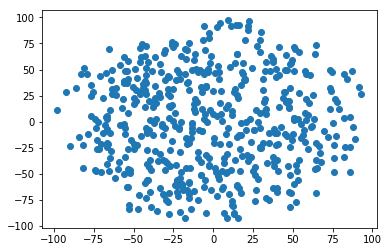

In [3]:
plt.plot(x,y,'o')

In [4]:
m = np.ones(len(x))*5e11
m = m/len(m)
print len(m)

523


In [5]:
from aceleracion import *

ax, ay, az = aceleracion.a_str(m,x,y,z,len(m))

In [6]:
from integradores import *

In [11]:
%%timeit
xx=x
yy=y
zz=z

vxx=vx
vyy=vy
vzz=vz

axx=ax
ayy=ay
azz=az

h = 0.001
nit = 1000
for k in range(0,nit):
       
    k1 = vxx
    k2 = vxx + k1*h/2.
    k3 = vxx + k2*h/2.
    k4 = vxx + k3*h
    xx = xx + h*(k1/6. + k2/3. + k3/3. + k4/6.)
    
    k1 = vyy
    k2 = vyy + k1*h/2.
    k3 = vyy + k2*h/2.
    k4 = vyy + k3*h
    yy = yy + h*(k1/6. + k2/3. + k3/3. + k4/6.)
    
    k1 = vzz
    k2 = vzz + k1*h/2.
    k3 = vzz + k2*h/2.
    k4 = vzz + k3*h
    zz = zz + h*(k1/6. + k2/3. + k3/3. + k4/6.)
    
    k1 = axx
    k2 = axx + k1*h/2.
    k3 = axx + k2*h/2.
    k4 = axx + k3*h
    vxx = vxx + h*(k1/6. + k2/3. + k3/3. + k4/6.)
    
    k1 = ayy
    k2 = ayy + k1*h/2.
    k3 = ayy + k2*h/2.
    k4 = ayy + k3*h
    vyy = vyy + h*(k1/6. + k2/3. + k3/3. + k4/6.)
    
    k1 = azz
    k2 = azz + k1*h/2.
    k3 = azz + k2*h/2.
    k4 = azz + k3*h
    vzz = vzz + h*(k1/6. + k2/3. + k3/3. + k4/6.)
    
    axx,ayy,azz = integradores.a_str(0.5,m,xx,yy,zz)
    

1 loop, best of 3: 33 s per loop


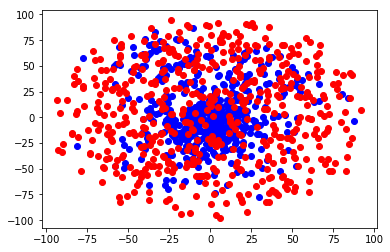

In [33]:
plt.plot(xx,yy,'o',color='b')
plt.plot(x,y,'o',color='r')

In [10]:
%%timeit
x0,y0,z0,vx0,vy0,vz0,ax0,ay0,az0 =integradores.rungek(0.5,h,nit,m,x,y,z,vx,vy,vz,ax,ay,az)

1 loop, best of 3: 33.9 s per loop


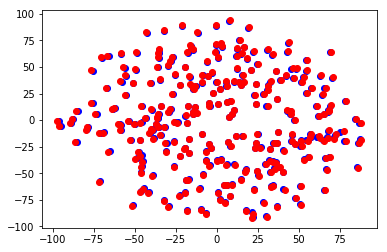

In [9]:
plt.plot(x0,y0,'o',color='b')
plt.plot(x,y,'o',color='r')

In [ ]:
print x

In [ ]:
x0, xx